### A. Pemrosesan Data dari Dataset

1. Load Dataset

In [1]:
import numpy as np
import pandas as pd

In [3]:
train_data = pd.read_csv('~/machine_vision/UTS/emnist_data/emnist-bymerge-train.csv', header=None)

In [5]:
X_train_images = train_data.iloc[:, 1:].values.reshape(-1, 28, 28).astype('float32')
y_train_labels = train_data.iloc[:, 0].values.astype('int')

2. Mengambil Subset Data

In [7]:
max_samples = 1000
if len(X_train_images) > max_samples:
    X_train_images = X_train_images[:max_samples]
    y_train_labels = y_train_labels[:max_samples]

### B. Parameter yang Digunakan pada HOG dan SVM

1. Ekstraksi Fitur HOG

In [9]:
from skimage.feature import hog

train_hog_features = []
train_hog_images = []
for image in X_train_images:
    feature, hog_img = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, block_norm='L2')
    train_hog_features.append(feature)
    train_hog_images.append(hog_img)
train_hog_features = np.array(train_hog_features)

2. Normalisasi Fitur HOG

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_hog_features_scaled = scaler.fit_transform(train_hog_features)


3. Parameter SVM

In [15]:
from sklearn import svm

svm_classifier = svm.SVC(kernel='rbf', C=1, gamma='scale')


### C. Metode Evaluasi LOOCV

1. Evaluasi dengan Leave-One-Out Cross-Validation (LOOCV)

In [19]:
from sklearn.model_selection import LeaveOneOut, cross_val_predict

In [21]:
loo = LeaveOneOut()
y_pred = cross_val_predict(svm_classifier, train_hog_features_scaled, y_train_labels, cv=loo)

### D. Perolehan Hasil Metrik Evaluasi

1. Penghitungan Metrik Evaluasi

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

conf_matrix = confusion_matrix(y_train_labels, y_pred)
accuracy = accuracy_score(y_train_labels, y_pred)
precision = precision_score(y_train_labels, y_pred, average='weighted')
recall = recall_score(y_train_labels, y_pred, average='weighted')
f1 = f1_score(y_train_labels, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.625
Precision: 0.5620162931674574
Recall: 0.625
F1 Score: 0.5709567283612091


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_train_labels, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_train_labels, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_train_labels, y_pred, average='weighted', zero_division=1)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.6820162931674575
Recall: 0.625
F1 Score: 0.5709567283612091


2. Plot Confusion Matrix

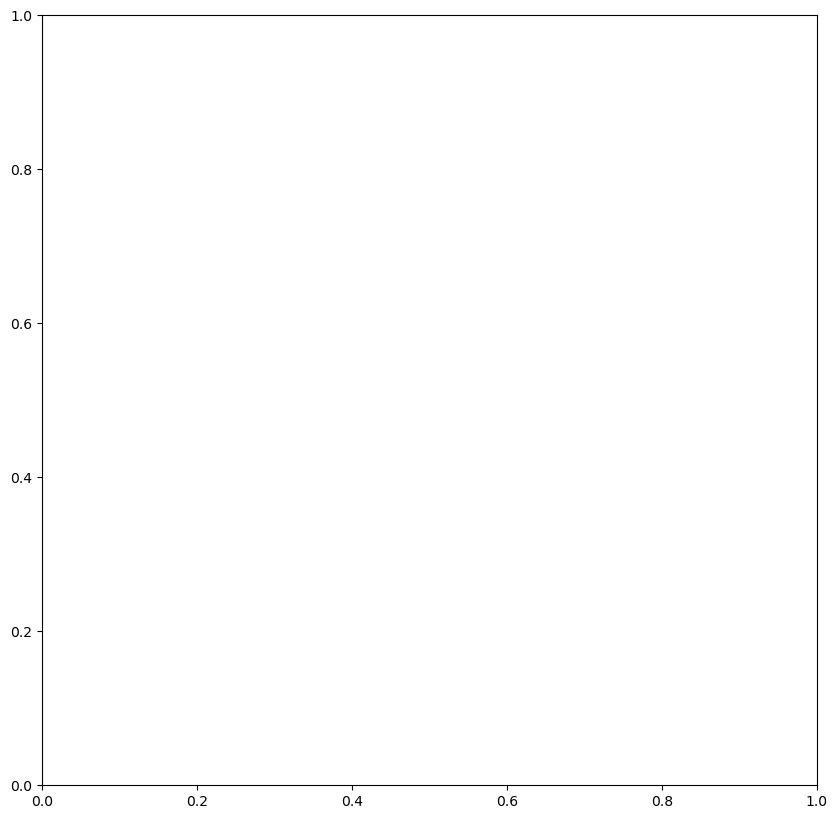

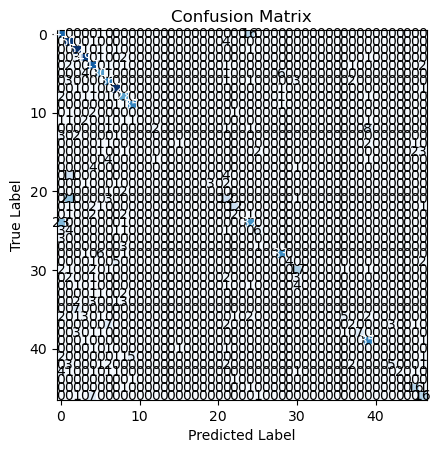

In [33]:
from mlxtend.plotting import plot_confusion_matrix

def plot_confusion_mat(cm):
    fig, ax = plt.subplots(figsize=(10, 10))
    plot_confusion_matrix(conf_mat=cm, cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

plot_confusion_mat(conf_matrix)

Perbandingan Gambar Asli dengan Ekstraksi Fitur HOG

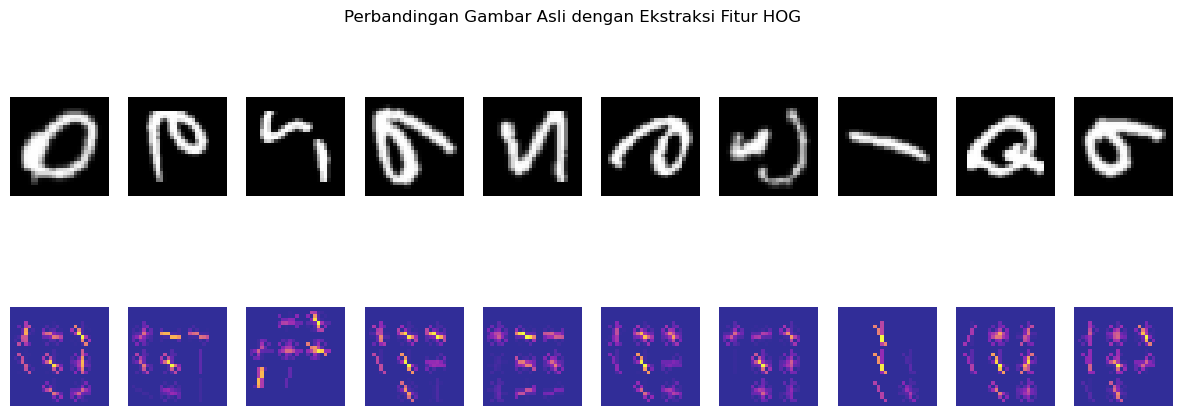

In [69]:
import random
import numpy as np

# Function to plot original images and HOG features with modifications
def plot_images_with_hog(X, hog_images, title="Perbandingan Gambar Asli dengan Ekstraksi Fitur HOG"):
    fig, axes = plt.subplots(2, 10, figsize=(15, 5))
    fig.suptitle(title)

    # Plot original images with random crop and flip
    for i in range(min(len(X), 10)):
        image = X[i].reshape((28, 28))
        
        # Randomly crop by removing a few pixels on each side
        crop_size = random.randint(0, 4)
        cropped_image = image[crop_size:28-crop_size, crop_size:28-crop_size]
        padded_image = np.pad(cropped_image, pad_width=crop_size, mode='constant', constant_values=0)
        
        # Randomly flip horizontally
        if random.random() > 0.5:
            padded_image = np.fliplr(padded_image)
        
        axes[0, i].imshow(padded_image, cmap='gray')
        axes[0, i].axis('off')

    # Plot HOG images with random colormap
    for i in range(min(len(hog_images), 10)):
        hog_img = hog_images[i]
        
        # Rotate HOG image slightly for some variety
        if random.random() > 0.5:
            hog_img = np.rot90(hog_img)
        
        axes[1, i].imshow(hog_img, cmap='plasma', alpha=0.85)  # Use a different colormap with some transparency
        axes[1, i].axis('off')

    plt.show()

# Display modified original and HOG images
plot_images_with_hog(X_train_images, train_hog_images)
